<a href="https://colab.research.google.com/github/Guhan-GitHub/Assesment1/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb).

Accuracy: 0.924314096499527

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       682
           1       0.88      0.91      0.90       375

    accuracy                           0.92      1057
   macro avg       0.91      0.92      0.92      1057
weighted avg       0.93      0.92      0.92      1057



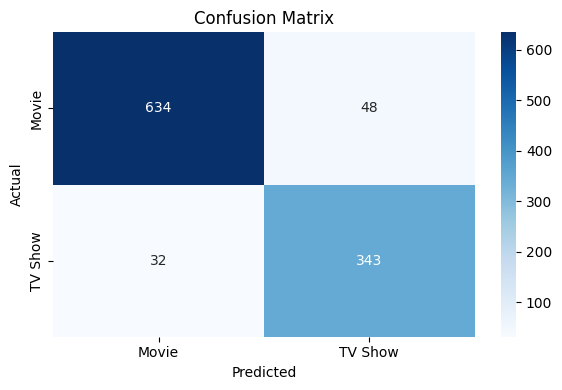

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv(r"Netflix_Cleaned.csv")

df['type'] = df['type'].map({'Movie': 0, 'Show': 1})

features = ['runtime', 'release_year', 'imdb_score', 'imdb_votes']
target = 'type'

df = df.dropna(subset=features + [target])

df['runtime'] = df['runtime'].astype(str).str.replace(' min', '', regex=False)
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')
df = df.dropna(subset=['runtime'])

X = df[features]
y = df[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Movie', 'TV Show'],
            yticklabels=['Movie', 'TV Show'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2602313240.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = labels
/tmp/ipython-input-2602313240.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PCA1'] = pca_data[:, 0]
/tmp/ipython-input-2602313240.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

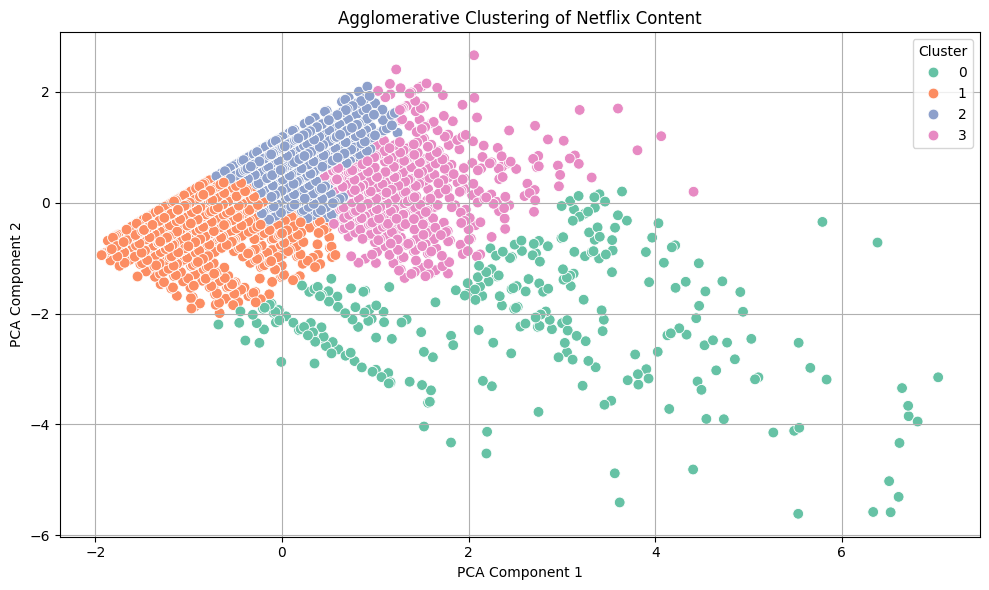

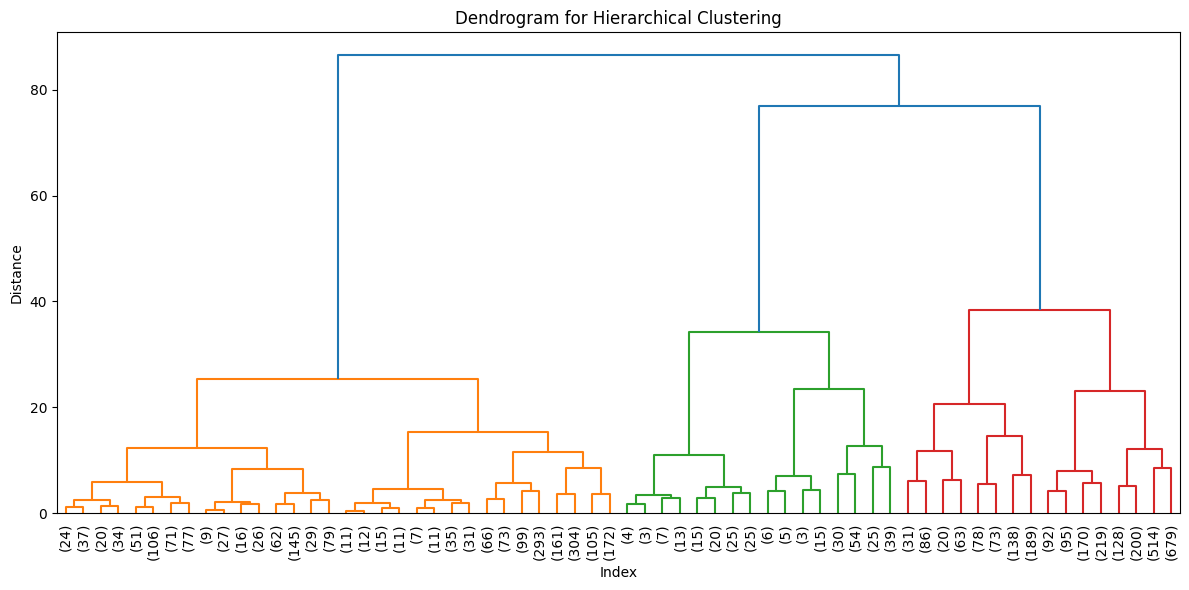

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

df = pd.read_csv(r"Netflix_Cleaned.csv")

df = df.dropna(subset=['runtime', 'release_year'])

df['runtime'] = df['runtime'].astype(str).str.replace(' min', '', regex=False)
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')

df = df.dropna(subset=['runtime'])

data = df[['runtime', 'release_year']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

agg_cluster = AgglomerativeClustering(n_clusters=4)
labels = agg_cluster.fit_predict(scaled_data)
data['Cluster'] = labels

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
data['PCA1'] = pca_data[:, 0]
data['PCA2'] = pca_data[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=60)
plt.title('Agglomerative Clustering of Netflix Content')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5, leaf_rotation=90., leaf_font_size=10.)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()